# **Cloning and Building Darknet**

In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 14997, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 14997 (delta 18), reused 26 (delta 8), pack-reused 14951
Receiving objects: 100% (14997/14997), 13.41 MiB | 14.32 MiB/s, done.
Resolving deltas: 100% (10183/10183), done.


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [ ]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

# **Custom Training**


In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Mounted at /content/gdrive


In [ ]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

 09lexi.gslides
 17_Experiment-06_Deepali_Pathe.gdoc
'17_Practical 4.gdoc'
'2020_10_07 8_40 PM Office Lens'
'2020_10_07 9_09 PM Office Lens.pdf'
'2020_11_10 4_25 PM Office Lens'
 486123119.pdf
 486144419.pdf
 56_Exp02.gdoc
 56_Experiment-06_Nikhil_Tiwari.gdoc
 56_Experiment-07_Nikhil_Tiwari.gdoc
 56_Experiment-08_Nikhil_Tiwari.gdoc
 56_Experiment-4.gdoc
 56_Experiment-5.gdoc
'56_Practical 4.gdoc'
'56_Practical 5.gdoc'
 56_TA-5_QUERY_PROCESSING_NIKHIL_TIWARI.gdoc
 57_Exp7.gdoc
 81_Expirement-4.gdoc
'A_57_Nikeshsingh Baghel_Practical4 (1).gdoc'
'A_57_Nikeshsingh Baghel_Practical4.gdoc'
'admission recept_1.jpg'
'admission recept.jpg'
'"And sometimes.txt'
'"A Preety face.txt'
'"A room.txt'
'assign 3.gdoc'
'Assign 4.gdoc'
'"A teacher.txt'
 B56_ASSIGNMENT3.gdoc
 B56_EXPERIMENT-05.gdoc
 B56_INTERNAL2.gdoc
 B56_Practical1_a_b.gdoc
'CD today.gdoc'
'Colab Notebooks'
'Copy of Nikhil Tiwari - CA -Nagpur.gsheet'
'COR_ASSIGNMENT .gdoc'
 CSP357_EXP01.gdoc
 CV
'DAA (1).gdoc'
'DAA ASSIGNMENT 1.gdoc'
 D

In [ ]:
# this is where my zip is stored (I created a yolov3 folder where I will get my required files from)
!ls /mydrive/helmet_yolov3

backup	generate_train.py  obj.data  obj.names	obj.zip  yolov3_custom.cfg


In [ ]:
%cd darknet/
!ls

/content/darknet
3rdparty	DarknetConfig.cmake.in	json_mjpeg_streams.sh  scripts
backup		darknet_images.py	LICENSE		       src
build		darknet.py		Makefile	       vcpkg.json
build.ps1	darknet_video.py	net_cam_v3.sh	       video_yolov3.sh
cfg		data			net_cam_v4.sh	       video_yolov4.sh
cmake		image_yolov3.sh		obj
CMakeLists.txt	image_yolov4.sh		README.md
darknet		include			results


In [ ]:
# copy the .zip file into the root directory of cloud VM
!cp /mydrive/helmet_yolov3/obj.zip ../

In [ ]:
# unzip the zip file and its contents should now be in /darknet/data/obj
!unzip ../obj.zip -d data/

Streaming output truncated to the last 5000 lines.
  inflating: data/obj/24543bc1581bb7db.jpg  
  inflating: data/obj/24543bc1581bb7db.txt  
  inflating: data/obj/2482315b6c4e5bb8.jpg  
  inflating: data/obj/2482315b6c4e5bb8.txt  
  inflating: data/obj/249b68a09f10c465.jpg  
  inflating: data/obj/249b68a09f10c465.txt  
  inflating: data/obj/24a014c30b1a393b.jpg  
  inflating: data/obj/24a014c30b1a393b.txt  
  inflating: data/obj/24b3cd48dacc21d5.jpg  
  inflating: data/obj/24b3cd48dacc21d5.txt  
  inflating: data/obj/24f3542b57bd3fb9.jpg  
  inflating: data/obj/24f3542b57bd3fb9.txt  
  inflating: data/obj/24f573c8f00cf521.jpg  
  inflating: data/obj/24f573c8f00cf521.txt  
  inflating: data/obj/250336669d034e3e.jpg  
  inflating: data/obj/250336669d034e3e.txt  
  inflating: data/obj/250a91221e481c4a.jpg  
  inflating: data/obj/250a91221e481c4a.txt  
  inflating: data/obj/251719be65ee66b3.jpg  
  inflating: data/obj/251719be65ee66b3.txt  
  inflating: data/obj/251f2f6a0ebea0ea.jpg  
  in

In [ ]:
!ls

3rdparty	DarknetConfig.cmake.in	json_mjpeg_streams.sh  scripts
backup		darknet_images.py	LICENSE		       src
build		darknet.py		Makefile	       vcpkg.json
build.ps1	darknet_video.py	net_cam_v3.sh	       video_yolov3.sh
cfg		data			net_cam_v4.sh	       video_yolov4.sh
cmake		image_yolov3.sh		obj
CMakeLists.txt	image_yolov4.sh		README.md
darknet		include			results


In [ ]:
# download cfg to google drive and change its name
# !cp cfg/yolov3.cfg /mydrive/helmet_yolov3/yolov3_custom.cfg

In [ ]:

!ls

3rdparty	DarknetConfig.cmake.in	json_mjpeg_streams.sh  scripts
backup		darknet_images.py	LICENSE		       src
build		darknet.py		Makefile	       vcpkg.json
build.ps1	darknet_video.py	net_cam_v3.sh	       video_yolov3.sh
cfg		data			net_cam_v4.sh	       video_yolov4.sh
cmake		image_yolov3.sh		obj
CMakeLists.txt	image_yolov4.sh		README.md
darknet		include			results


In [ ]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /mydrive/helmet_yolov3/yolov3_custom.cfg ./cfg

# upload the custom .cfg back to cloud VM from local machine (uncomment to use)
#%cd cfg
#upload()
#%cd .. 

In [ ]:
!ls
%cd darknet/

3rdparty	DarknetConfig.cmake.in	json_mjpeg_streams.sh  scripts
backup		darknet_images.py	LICENSE		       src
build		darknet.py		Makefile	       vcpkg.json
build.ps1	darknet_video.py	net_cam_v3.sh	       video_yolov3.sh
cfg		data			net_cam_v4.sh	       video_yolov4.sh
cmake		image_yolov3.sh		obj
CMakeLists.txt	image_yolov4.sh		README.md
darknet		include			results
[Errno 20] Not a directory: 'darknet/'
/content/darknet


In [ ]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/helmet_yolov3/obj.names ./data
!cp /mydrive/helmet_yolov3/obj.data  ./data

# upload the obj.names and obj.data files to cloud VM from local machine (uncomment to use)
#%cd data
#upload()
#%cd .. 

In [ ]:
# upload the generate_train.py script to cloud VM from Google Drive
!cp /mydrive/helmet_yolov3/generate_train.py ./

# upload the generate_train.py script to cloud VM from local machine (uncomment to use)
#upload()


In [ ]:
!python generate_train.py

In [ ]:
# verify train.txt can be seen in our darknet/data folder
!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     train.txt
coco.names  goal.txt	 labels			   openimages.names  voc.names
dog.jpg     horses.jpg	 obj			   person.jpg


In [ ]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

--2021-04-29 09:20:49--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2021-04-29 09:20:49--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  22.8MB/s    in 7.7s    

2021-04-29 09:20:58 (20.1 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
!ls

3rdparty	darknet53.conv.74	image_yolov4.sh        README.md
backup		DarknetConfig.cmake.in	include		       results
build		darknet_images.py	json_mjpeg_streams.sh  scripts
build.ps1	darknet.py		LICENSE		       src
cfg		darknet_video.py	Makefile	       vcpkg.json
cmake		data			net_cam_v3.sh	       video_yolov3.sh
CMakeLists.txt	generate_train.py	net_cam_v4.sh	       video_yolov4.sh
darknet		image_yolov3.sh		obj


In [ ]:
# download cfg to google drive and change its name
# !cp cfg/yolov3.cfg /mydrive/helmet_yolov3/yolov3_custom.cfg

In [ ]:
# train your custom detector
#!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

In [ ]:
#imShow('chart.png')

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights -dont_show

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
yolov3_custom
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 4, batch = 64, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shor

In [ ]:
#imShow('chart.png')

In [ ]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
%cd ..


/content/darknet/cfg
/content/darknet


In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
# !./darknet detector test data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights /mydrive/images/safari.jpg -thresh 0.3
# imShow('predictions.jpg')

# **TESTING**

In [ ]:
import re
def check_next():
    path='data/result.txt'
    myfile=open(path,'r')
    lines=myfile.readlines()
    pattern= "Helmet"
    flag = True
    for line in lines:
      if re.search(pattern,line):
        flag =False
    if flag: 
      !cp predictions.jpg /mydrive/license_test/frame1.jpg

In [ ]:
!cp /mydrive/images/frame0.jpg data/img/frame1.jpg

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 

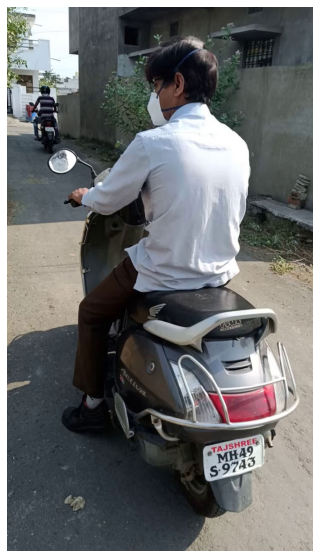

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /mydrive/helmet_yolov3/backup/yolov3_custom_last.weights /mydrive/images/1.jpg -thresh 0.3 -ext_output < data/valid.txt > data/result.txt
imShow('predictions.jpg')
check_next()

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5, 

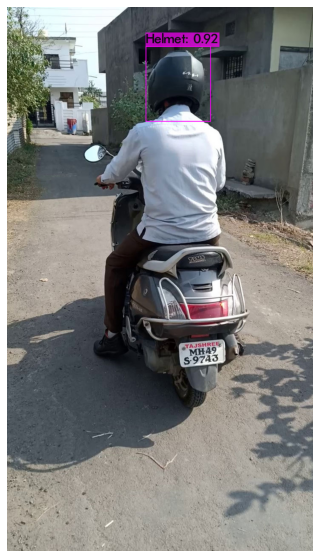

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /mydrive/helmet_yolov3/backup/yolov3_custom_last.weights /mydrive/images/2.jpg -thresh 0.3
imShow('predictions.jpg')
check_next()